<a href="https://colab.research.google.com/github/gfarhani/Quantum_Computing/blob/main/Chapter1/Teleportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit qiskit-aer



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.2 MB/s eta 0:00:00


In [5]:
#!pip -q install matplotlib pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


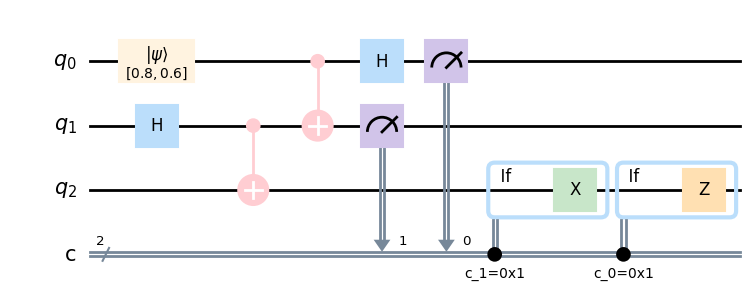

In [6]:
# if you’re in colab/jupyter and drawing fails, run this once:
# !pip -q install "qiskit[visualization]" --upgrade

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

q = QuantumRegister(3, "q")
c = ClassicalRegister(2, "c")          # c[0]=m1, c[1]=m2
qc = QuantumCircuit(q, c)

alpha, beta = 0.8, 0.6
norm = np.sqrt(alpha**2 + beta**2)
alpha, beta = alpha/norm, beta/norm

qc.initialize([alpha, beta], q[0])

# create bell pair between q1 (alice ancilla) and q2 (bob)
qc.h(q[1])
qc.cx(q[1], q[2])

# bell measurement on (q0, q1)
qc.cx(q[0], q[1])
qc.h(q[0])
qc.measure(q[0], c[0])   # m1
qc.measure(q[1], c[1])   # m2

# corrections on bob’s qubit q2 using dynamic-circuit if_test
# (this replaces qc.x(...).c_if(...) which can fail in newer qiskit)
with qc.if_test((c[1], 1)):
    qc.x(q[2])
with qc.if_test((c[0], 1)):
    qc.z(q[2])

# colorful style (every color must be a full color name or a full hex like "#RRGGBB")
style = {
    "displaycolor": {
        "initialize": ("#fff3e0", "#000000"),
        "h":          ("#bbdefb", "#000000"),
        "cx":         ("#ffcdd2", "#000000"),
        "x":          ("#c8e6c9", "#000000"),
        "z":          ("#ffe0b2", "#000000"),
        "measure":    ("#d1c4e9", "#000000"),
    },
    "fontsize": 12,
    "subfontsize": 10,
}

fig = qc.draw(output="mpl", fold=-1, style=style)
display(fig)
plt.show()
